# DME ignition delay profiles demo
Mike Hansen, March 2019

In [2]:
from spitfire.chemistry.mechanism import ChemicalMechanismSpec
from spitfire.chemistry.reactors import HomogeneousReactor

import matplotlib.pyplot as plt
from numpy import linspace, zeros_like
from cantera import one_atm

In [3]:
b = ChemicalMechanismSpec(cantera_xml='mechanisms/dme-bhagatwala.xml', group_name='dme-bhagatwala')

air = b.stream(stp_air=True)

h2 = b.stream('X', 'CH3OCH3:1, CH4:1')

phi = 1.0
blend = b.mix_for_equivalence_ratio(phi, h2, air)

temperature_list = linspace(600., 1400., 20)
pressure_atm_list = [4., 8., 10., 20., 50., 100.]
markers_list = ['o', 's', '^', 'D', 'P', '*']

computing ignition delay profile for 4.0 atm


<IPython.core.display.Javascript object>


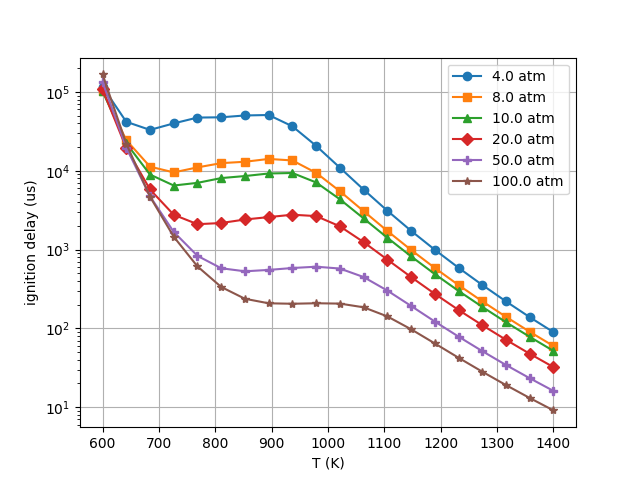

computing ignition delay profile for 8.0 atm
computing ignition delay profile for 10.0 atm
computing ignition delay profile for 20.0 atm
computing ignition delay profile for 50.0 atm
computing ignition delay profile for 100.0 atm
completed in 8.432274838036392 s


In [5]:
%matplotlib notebook
from time import perf_counter as timer

t0 = timer()
for pressure, marker in zip(pressure_atm_list, markers_list):
    print('computing ignition delay profile for {:.1f} atm'.format(pressure))
    tau_list = zeros_like(temperature_list)

    for idx, temperature in enumerate(temperature_list):
        #print('  computing temperature {:3} of {:2}'.format(idx + 1, temperature_list.size))

        mix = b.copy_stream(blend)
        mix.TP = temperature, pressure * one_atm

        r = HomogeneousReactor(b, mix,
                               'isobaric',
                               'adiabatic',
                               'closed')
#         tau_list[idx] = r.compute_ignition_delay()
        tau_list[idx] = r.compute_ignition_delay_direct_griffon()

    plt.semilogy(temperature_list, tau_list * 1.e6, '-' + marker, label='{:.1f} atm'.format(pressure))

print('completed in', timer() - t0, 's')
plt.xlabel('T (K)')
plt.ylabel('ignition delay (us)')
plt.legend()
plt.grid()
plt.show()